# random forest

In [241]:
import pandas as pd
from clearml import Task
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

pd.options.display.max_columns=60

In [ ]:
import clearml
clearml.__version__

In [256]:
def mape(true, pred):
    return 100 * ((true-pred)/true).abs().mean()

def metric_main(true, pred):
    return (1 - np.sum(np.abs(true-pred))/np.sum(true))

In [ ]:
# task_ids = Task.query_tasks(project_name='zra/0407')
task_ids = Task.query_tasks(task_filter={'parent': "b5f9c93309b04ebc98497080d4584b0b"})

# task_ids = Task.get_tasks(project_name='zra/0407')
# task_id = task_ids.pop()
# task = Task.get_task(task_id)

In [ ]:

# task = Task.get_task("d3e5bcb46d2a4a25a5df5850fda375d7")

In [ ]:
# {'dataset': {'dataset_file_name': 'dataset_ws60.parquet',
#   'dataset_id': '5dc94de095014553acbe4f011a579241'},
#  'dataset_params': {'analog_group': '150',
#   'business_unit': 'all',
#   'log_target': 'True',
#   'scaler_kwargs': '',
#   'scaling': 'Standard',
#   'split_date': '01.01.2021',
#   'target_column_name_formatter': 'predict_normalized_{}',
#   'window_size': '120'},
#  'kflod_kwargs_params': {'n_splits': '5', 'shuffle': 'False'},
#  'model_kwargs_params': {'alpha': '1.0',
#   'max_depth': '20',
#   'n_estimators': '50'},
#  'model_type_params': {'model_type': 'RandomForestRegressor',
#   'save_kfold_predicts': 'True',
#   'save_model': 'False',
#   'use_kfold': 'False'}}

In [ ]:
def make_dict(task_ids):
    all_data = []
    for task_id in task_ids:
        task = Task.get_task(task_id)
        if task.status!='completed':
            continue
        parameters = task.get_parameters_as_dict()
        scalars = task.get_reported_scalars()
                
        mae = scalars['month']['mae']
        mae = pd.Series(index=mae['x'], data=mae['y'], name=mae['name'])
        rmse = scalars['month']['rmse']
        rmse = pd.Series(index=rmse['x'], data=rmse['y'], name=rmse['name'])

        all_data.append((parameters, (mae, rmse)))
    return all_data


def parse_all_data(all_data):
    res = []

    for x in all_data:
        d = {}
        d['metrics'] = x[1]
        d['bu'] = params['dataset_params']['business_unit']
        d['analog'] = params['dataset_params']['analog_group']
        d['log_target'] = params['dataset_params']['log_target']
        d['scaling'] = params['dataset_params']['scaling']
        d['target_column_name_formatter'] = params['dataset_params']['target_column_name_formatter']
        d['window_size'] = params['dataset_params']['window_size']
        d['use_kfold'] = params['model_type_params']['use_kfold']
        d['model_type'] = params['model_type_params']['model_type']
        d['model_kwargs_params'] = params['model_kwargs_params']
        d['max_depth'] = d['model_kwargs_params']['max_depth']
        d['n_estimators'] = d['model_kwargs_params']['n_estimators']
        res.append(d)
    return res

# def uniq_combinations(l: list, keys=['bu', 'analog']):
#     return set(map(lambda x: tuple([x[key] for key in keys]), l))

def make_res_df(res):
    res_df = pd.DataFrame(list(map(lambda x: {key: value for key, value in x.items() if key!='metrics'}, res)))
    res_df = res_df.merge(pd.concat(list(map(lambda x: x['metrics'][0], res)), axis=1).T.rename({i: f'mae_{i}' for i in range(12)}, axis=1).reset_index(drop=True), left_index=True, right_index=True)
    res_df = res_df.merge(pd.concat(list(map(lambda x: x['metrics'][1], res)), axis=1).T.rename({i: f'rmse_{i}' for i in range(12)}, axis=1).reset_index(drop=True), left_index=True, right_index=True)
    return res_df

def plot_metrics(res_df, groupby='analog'):
    mae_cols = [f'mae_{i}' for i in range(12)]
    rmse_cols = [f'rmse_{i}' for i in range(12)]
    for key, group in res_df.groupby(groupby):
        group[mae_cols].T.plot(legend=False, title=key, ylabel='mae')
        group[rmse_cols].T.plot(legend=False, title=key, ylabel='rmse')


In [ ]:
# all_data_rf = []

# # for task_id in map(lambda x: x.task_id, task_ids):
# for task_id in task_ids:
#     task = Task.get_task(task_id)
#     # if task.status=='completed' and len(task.get_tags())>0:
#     if task.status=='completed' and task.parent=="b5f9c93309b04ebc98497080d4584b0b":
#         parameters = task.get_parameters_as_dict()
#         scalars = task.get_reported_scalars()
                
#         mae = scalars['month']['mae']
#         mae = pd.Series(index=mae['x'], data=mae['y'], name=mae['name'])
#         rmse = scalars['month']['rmse']
#         rmse = pd.Series(index=rmse['x'], data=rmse['y'], name=rmse['name'])

#         all_data_rf.append((parameters, (mae, rmse)))

all_data_rf = make_dict(task_ids)


In [ ]:
all_data_rf.__len__(), task_ids.__len__()

In [ ]:
res_rf = parse_all_data(all_data_rf)
res_df_rf = make_res_df(res_rf)

In [ ]:
mae_cols = [f'mae_{i}' for i in range(12)]
rmse_cols = [f'rmse_{i}' for i in range(12)]

In [ ]:
# for key, group in res_df.groupby('analog'):
#     # print(group.shape)
#     # break
#     group[mae_cols].plot()
#     group[rmse_cols].plot()

In [ ]:
# for key, group in res_df.groupby('analog'):
#     # print(group.shape)
#     # break
#     group[mae_cols].T.plot(legend=False, title=key, ylabel='mae')
#     group[rmse_cols].T.plot(legend=False, title=key, ylabel='rmse')

plot_metrics(res_df_rf)

# catboost

In [308]:
task_ids_cb = Task.query_tasks(project_name='zra/0507', task_filter={'parent': "9950fc7379eb4cd29d95701c713d3444"})

In [ ]:
all_data_cb = make_dict(task_ids_cb)


In [ ]:
all_data_cb.__len__(), task_ids_cb.__len__()

In [ ]:
res_cb = parse_all_data(all_data_cb)
res_df_cb = make_res_df(res_cb)

In [ ]:
res_df_cb

In [ ]:
res_df = pd.concat([res_df_cb, res_df_rf]).reset_index(drop=True)

In [ ]:
res_df

In [ ]:
plot_metrics(res_df)

In [ ]:
df.loc[idxmin]

In [ ]:
res = []

for key, df in res_df.groupby('analog'):
    for metric in ['mae', 'rmse']:
        for month in range(12):
            t = f"{metric}_{month}"
            # print(key, t, df.loc[df[t].idxmin()][['model_type']].values[0])
            idxmin = df[t].idxmin()
            res.append((key, metric, month, idxmin, df.loc[idxmin]['model_type'], df.loc[idxmin]['window_size']))

res = pd.DataFrame(res, columns=['bu', 'metric', 'month', 'idxmin', 'model_type', 'window_size'])

In [ ]:
res.head()

In [ ]:
res['model_type'].value_counts(normalize=True)

In [ ]:
res.groupby(['bu', 'metric']).agg({'model_type': 'value_counts'})

In [ ]:
res.groupby(['month']).agg({'model_type': 'value_counts'})

In [ ]:
res.groupby(['window_size']).agg({'model_type': ['value_counts']}).reset_index()

In [ ]:
126/(126+32+34)

In [ ]:
res

In [ ]:
res_df

In [ ]:
res_df.groupby('analog')[['mae_0', 'mae_1', 'mae_2', 'mae_3',
       'mae_4', 'mae_5', 'mae_6', 'mae_7', 'mae_8', 'mae_9', 'mae_10',
       'mae_11']] \
        .min()

In [ ]:
res_df.groupby('analog')[['rmse_0', 'rmse_1', 'rmse_2', 'rmse_3', 'rmse_4', 'rmse_5',
       'rmse_6', 'rmse_7', 'rmse_8', 'rmse_9', 'rmse_10', 'rmse_11']] \
        .min()

# Посмотрим на предикты, где не было логарифмирования

- 7c330a572c3f4f9c90c24f133a531b35 - 500
- de0210eef5bc4d498c867b9f834ae4f5 - 100
- dc0c9989cc714296a75332804513bd30 - 200

Оно было везде...

In [ ]:
import pickle

In [ ]:
# task = Task.get_task("7c330a572c3f4f9c90c24f133a531b35")
task = Task.get_task("de0210eef5bc4d498c867b9f834ae4f5")



In [ ]:
path = task.artifacts['model_results'].get_local_copy()
with open(path, 'rb') as f:
    data = pickle.load(f)

In [ ]:
target = task.get_parameters_as_dict()['dataset_params']['target_column_name_formatter']

months = len(data)

In [ ]:
target

In [ ]:
month = 9
true_pred = data[month]['X_test_with_predict'][[f"predict_{month}", target.format(month), 'model_predict']]
true_pred
# true_pred.plot()


In [ ]:
task = Task.get_task("dc0c9989cc714296a75332804513bd30")


In [ ]:
path = task.artifacts['model_results'].get_local_copy()
with open(path, 'rb') as f:
    data = pickle.load(f)

In [ ]:
target = task.get_parameters_as_dict()['dataset_params']['target_column_name_formatter']

months = len(data)

In [ ]:
target

In [ ]:
month = 0
true_pred = data[month]['X_test_with_predict'][[f"predict_{month}", target.format(month), 'model_predict']]
true_pred
# true_pred.plot()


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(true_pred['predict_normalized_0'], true_pred['model_predict'])

# Для Василия

In [ ]:
from functools import reduce

In [ ]:
task = Task.get_task("9950fc7379eb4cd29d95701c713d3444")

In [ ]:
parameters = task.get_parameters()

In [ ]:
parameters

In [ ]:
task_ids_cb = Task.query_tasks(task_filter={'parent': "9950fc7379eb4cd29d95701c713d3444"})
analog_dict = dict()

for task_id in task_ids_cb:
    task = Task.get_task(task_id)
    parameters = task.get_parameters()
    analog = parameters['dataset_params/analog_group']
    if analog in analog_dict.keys():
        continue
    
    path = task.artifacts['model_results'].get_local_copy()
    with open(path, 'rb') as f:
        data = pickle.load(f)

    target = task.get_parameters_as_dict()['dataset_params']['target_column_name_formatter']

    months = len(data)
    preds = []
    for month in range(months):
        df = data[month]['X_test_with_predict'][['cut_date', 'model_predict']].rename({'model_predict': "predict_{}".format(month)}, axis=1)
        preds.append(df)
    preds = reduce(lambda a, b: a.merge(b, on='cut_date'), preds)
    analog_dict[analog] = preds

In [311]:
# с true

task_ids_cb = Task.query_tasks(task_filter={'parent': "9950fc7379eb4cd29d95701c713d3444"})
analog_dict = dict()

for task_id in task_ids_cb:
    task = Task.get_task(task_id)
    parameters = task.get_parameters()
    analog = parameters['dataset_params/analog_group']
    if analog in analog_dict.keys():
        continue
    
    path = task.artifacts['model_results'].get_local_copy()
    with open(path, 'rb') as f:
        data = pickle.load(f)

    target = task.get_parameters_as_dict()['dataset_params']['target_column_name_formatter']

    months = len(data)
    preds = []
    true = []
    for month in range(months):
        df = data[month]['X_test_with_predict'][['cut_date', 'model_predict']].rename({'model_predict': "predict_{}".format(month)}, axis=1)
        df["predict_{}".format(month)] = np.expm1(df["predict_{}".format(month)])
        preds.append(df)

        df = data[month]['X_test_with_predict'][['cut_date', f'predict_{month}']].rename({f'predict_{month}': "true_{}".format(month)}, axis=1)
        true.append(df)
    preds = preds + true
    preds = reduce(lambda a, b: a.merge(b, on='cut_date'), preds)
    preds = preds.reset_index().rename(columns={'index': 'DN'})
    preds['DN'] = analog
    analog_dict[analog] = preds

In [ ]:
analog_dict['500']

In [ ]:
# with open(r'D:\gpn\for_vasiliy.pkl', 'wb') as f:
#     pickle.dump(analog_dict, f)



In [ ]:
for key in analog_dict:
    analog_dict[key]['DN'] = key



In [312]:
pd.concat(analog_dict.values()).reset_index(drop=True).to_excel(r'D:\gpn\for_vasiliy\for_vasiliy3.xlsx', index=0)

# look processing
analysis.ipunb


In [ ]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from typing import List, Dict, Optional, Tuple, Union, Any
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from utils.preprocessing import init_scaler_original, init_scaler, columns_for_deletion

In [ ]:
def split_train_test(
    data_df: pd.DataFrame,
    business_unit: str,
    analog_group: str,
    window_size: int,
    split_date: datetime.date,
    n_predict: int,
    target_column_name_formatter: str,
    log_target: bool = False,
    scaling: Optional[str] = None,
    scaler_kwargs: Optional[Dict[str, Any]] = None,
    drop_not_scalable: bool = True
):
    """_summary_

    Args:
        data_df (pd.DataFrame): Preprocessed dataframe
        analog_group (Union[str, int]): Specific group of analogs.
        window_size (int): number of days used to create the dataset.
        split_date (datetime.date): day relative to which the train and test are divided.
        n_predict (int): What month is the prediction for.
        target_column_name_formatter (str): What value is predicted.
        log_target (bool, optional): whether to logarithm target or not. Defaults to False.
        scaling (Optional[str], optional): whether use specific scaling or not. Defaults to None.
        scaler_kwargs (Optional[Dict[str, Any]], optional): Scaler kwargs if needed. Defaults to None.
        drop_not_scalable (bool, optional): _description_. Defaults to True.

    Raises:
        ValueError: _description_

    Returns:
        _type_: _description_
    """
    if isinstance(split_date, str):
        # split_date = datetime.datetime.strptime(split_date, "%d.%m.%Y").date()
        split_date = pd.to_datetime(split_date)

    valid_scaling = ['MinMaxScaler', 'StandardScaler']
    valid_scaling += ['MinMax', 'Standard']

    target_column_name = target_column_name_formatter.format(n_predict)
    # if target_column_name not in data_df.columns:
    #     raise ValueError(f'Missed columns: {target_column_name}')

    # check scaling
    if scaling and scaling not in valid_scaling:
        raise ValueError("scaling_type must be one of %r." % valid_scaling)

    # tdf = data_df[(data_df['business_unit'] == business_unit) &
    #               (data_df['material_cd'] == analog_group) &
    #               (data_df['window_size'] == window_size)
    #               ]

    print(f"Unique window_sizes: {data_df['window_size'].unique()}")

    tdf = data_df[(data_df['business_unit'] == business_unit)]
    print(tdf.shape[0])
    tdf = tdf[tdf['material_cd'] == analog_group]
    print(tdf.shape[0])
    # tdf = tdf[tdf['window_size'] == window_size]
    # print(tdf.shape[0])


    # split to train and test
    date_to_split = split_date - relativedelta(days=30) * (n_predict + 1)
    date_split_query = tdf['cut_date'].dt.date < date_to_split

    # train_slice = tdf[date_split_query]
    # test_slice = tdf[~date_split_query]

    train_slice = tdf[tdf['cut_date'].dt.date < date_to_split]
    test_slice = tdf[tdf['cut_date'].dt.date >= split_date]

    # work around target
    y_train = train_slice[target_column_name]
    y_test = test_slice[target_column_name]

    if log_target:
        y_train = np.log1p(y_train)
        y_test = np.log1p(y_test)

    if scaler_kwargs is None or len(scaler_kwargs)==0:
        scaler_kwargs = {}
    # scaling, scaler = self.init_scaler(scaling, **scaler_kwargs)
    scaling, scaler = init_scaler_original(scaling, **scaler_kwargs)

    # delete cut_date, mtr_cd, business_unit, w_size, predicts
    columns_to_drop = ['cut_date', 'material_cd',
                       'business_unit', 'window_size']
    columns_to_drop += columns_for_deletion(tdf, startswith='predict')

    # X_train = train_slice.drop(columns_to_drop, axis=1)
    # X_test = test_slice.drop(columns_to_drop, axis=1)
    X_train = train_slice[:]
    X_test = test_slice[:]

    # # delete stock_bmu_count in sum_df dataset
    # if mtr_group == "all":
    #     X_train = X_train.drop(['stock_bmu_count'], axis=1)
    #     X_test = X_test.drop(['stock_bmu_count'], axis=1)
    print(f"Train Shape : {train_slice.shape}, Test Shape {test_slice.shape}")

    if X_train.shape[0]==0:
        return X_train, X_test, y_train, y_test

    # applying scaling
    if scaling:
        columns_list = X_train.columns
        columns_list_ = list(set(X_train.columns) - set(columns_to_drop))

        X_train_ = scaler.fit_transform(X_train[columns_list_])
        X_test_ = scaler.transform(X_test[columns_list_])

        X_train.loc[:, columns_list_] = X_train_
        X_test.loc[:, columns_list_] = X_test_

        # X_train = pd.DataFrame(
        #     X_train, columns=columns_list, index=train_slice.index)
        # X_test = pd.DataFrame(X_test, columns=columns_list,
        #                     index=test_slice.index)

        if not drop_not_scalable:
            for col in columns_to_drop:
                X_train[col] = train_slice[col]
                X_test[col] = test_slice[col]

    return X_train, X_test, y_train, y_test

In [ ]:
month = 0
df = data[month]['X_test_with_predict']
df



In [ ]:
df['predict_0']

In [ ]:
df.shape

# mape

In [ ]:
import pickle

In [ ]:
task_ids = Task.query_tasks(task_filter={'parent': "b5f9c93309b04ebc98497080d4584b0b"})
task_id = task_ids.pop()

In [ ]:
# task = Task.get_task(task_id)
task = Task.get_task("a9d8474580904ad8a70a7db35cb27bdf")

In [ ]:
path = task.artifacts['model_results'].get_local_copy()

In [ ]:
data

In [ ]:
with open(path, 'rb') as f:
    df = pickle.load(f)

In [ ]:
pd.DataFrame(df)

In [ ]:
len(df), len(df[0])

In [ ]:
df[0].keys(), df[1].keys()

In [ ]:
task.get_parameters_as_dict()['dataset_params']['target_column_name_formatter']

In [ ]:
df[1]['X_test_with_predict']#['predict_normalized_']

In [ ]:
for task_id in task_ids:
    task = Task.get_task(task_id)
    path = task.artifacts['model_results'].get_local_copy()
    with open(path, 'rb') as f:
        data = pickle.load(f)

    target = task.get_parameters_as_dict()['dataset_params']['target_column_name_formatter']

    months = len(data)
    # true_preds = []
    for month in range(months):
        model_true = {target.format(month): "model_true"}
        true_pred = data[month]['X_test_with_predict'].rename(model_true, axis=1)[['model_true', 'model_predict']]
        # true_preds.append(true_pred)
        true = true_pred['model_true']
        pred = true_pred['model_predict']
        mapes.append(mape(true, pred))
    break
        

    
        

In [ ]:
all_data = []

# for task_id in map(lambda x: x.task_id, task_ids):
for task_id in task_ids:
    if task.status!='completed':
        continue
    task = Task.get_task(task_id)
    path = task.artifacts['model_results'].get_local_copy()
    with open(path, 'rb') as f:
        data = pickle.load(f)
    
    parameters = task.get_parameters_as_dict()
    scalars = task.get_reported_scalars()
            
    mae = scalars['month']['mae']
    mae = pd.Series(index=mae['x'], data=mae['y'], name=mae['name'])
    rmse = scalars['month']['rmse']
    rmse = pd.Series(index=rmse['x'], data=rmse['y'], name=rmse['name'])

    target = parameters['dataset_params']['target_column_name_formatter']
    months = len(data)

    mapes = []
    maes = []
    rmses = []
    
    for month in range(months):
        model_true = {target.format(month): "model_true"}
        true_pred = data[month]['X_test_with_predict'].rename(model_true, axis=1)[['model_true', 'model_predict']]

        true = true_pred['model_true']
        pred = true_pred['model_predict']

        true = np.expm1(true)
        pred = np.expm1(pred)

        mapes.append(mape(true, pred))
        rmses.append(mean_squared_error(true, pred, squared=False))
        maes.append(mean_absolute_error(true, pred))

    mapes = pd.Series(data=mapes, name='mape')
    rmses = pd.Series(data=rmses, name='rmse')
    maes = pd.Series(data=maes, name='mae')

    all_data.append((parameters, (maes, rmses, mapes)))


In [ ]:
def parse_all_data(all_data):
    res = []

    for x in all_data:
        d = {}
        d['metrics'] = x[1]
        d['bu'] = params['dataset_params']['business_unit']
        d['analog'] = params['dataset_params']['analog_group']
        d['log_target'] = params['dataset_params']['log_target']
        d['scaling'] = params['dataset_params']['scaling']
        d['target_column_name_formatter'] = params['dataset_params']['target_column_name_formatter']
        d['window_size'] = params['dataset_params']['window_size']
        d['use_kfold'] = params['model_type_params']['use_kfold']
        d['model_type'] = params['model_type_params']['model_type']
        d['model_kwargs_params'] = params['model_kwargs_params']
        d['max_depth'] = d['model_kwargs_params']['max_depth']
        d['n_estimators'] = d['model_kwargs_params']['n_estimators']
        res.append(d)
    return res

# def uniq_combinations(l: list, keys=['bu', 'analog']):
#     return set(map(lambda x: tuple([x[key] for key in keys]), l))

def make_res_df(res):
    res_df = pd.DataFrame(list(map(lambda x: {key: value for key, value in x.items() if key!='metrics'}, res)))
    res_df = res_df.merge(pd.concat(list(map(lambda x: x['metrics'][0], res)), axis=1).T.rename({i: f'mae_{i}' for i in range(12)}, axis=1).reset_index(drop=True), left_index=True, right_index=True)
    res_df = res_df.merge(pd.concat(list(map(lambda x: x['metrics'][1], res)), axis=1).T.rename({i: f'rmse_{i}' for i in range(12)}, axis=1).reset_index(drop=True), left_index=True, right_index=True)
    return res_df



In [ ]:
res = parse_all_data(all_data)
res_df = make_res_df(res)

# all metrics

In [170]:
task_ids_cb = Task.query_tasks(project_name='zra/0507', task_filter={'parent': "9950fc7379eb4cd29d95701c713d3444"}) # cb
task_ids_rf = Task.query_tasks(task_filter={'parent': "b5f9c93309b04ebc98497080d4584b0b"})

In [188]:
all_data_cb = []

# for task_id in map(lambda x: x.task_id, task_ids):
for task_id in task_ids_cb:
    task = Task.get_task(task_id)
    if task.status!='completed':
        continue
    path = task.artifacts['model_results'].get_local_copy()
    with open(path, 'rb') as f:
        data = pickle.load(f)

    if len(data)==0:
        continue
    
    parameters = task.get_parameters_as_dict()
    scalars = task.get_reported_scalars()

    target = parameters['dataset_params']['target_column_name_formatter']
    months = len(data)

    d = []
    for month in range(months):
        model_true = {target.format(month): "model_true"}
        true_pred = data[month]['X_test_with_predict'].rename(model_true, axis=1)[['cut_date', 'model_true', 'model_predict']]
        true_pred = true_pred.query('cut_date<\'2021-06-01\'')
        true_pred['model_predict'] = np.expm1(true_pred['model_predict'])

        # true = true_pred['model_true']
        # pred = true_pred['model_predict']

        # mapes.append(mape(true, pred))
        # rmses.append(mean_squared_error(true, pred, squared=False))
        # maes.append(mean_absolute_error(true, pred))
        d.append(true_pred)

    # data = reduce(lambda a, b: a.merge(b, on='cut_date))

    # mapes = pd.Series(data=mapes, name='mape')
    # rmses = pd.Series(data=rmses, name='rmse')
    # maes = pd.Series(data=maes, name='mae')

    # all_data_cb.append((parameters, (maes, rmses, mapes)))
    all_data_cb.append((parameters, d))
    # break

In [189]:
all_data_rf = []

# for task_id in map(lambda x: x.task_id, task_ids):
for task_id in task_ids_rf:
    task = Task.get_task(task_id)
    if task.status!='completed':
        continue
    path = task.artifacts['model_results'].get_local_copy()
    with open(path, 'rb') as f:
        data = pickle.load(f)

    if len(data)==0:
        continue
    
    parameters = task.get_parameters_as_dict()
    scalars = task.get_reported_scalars()

    target = parameters['dataset_params']['target_column_name_formatter']
    months = len(data)

    d = []
    for month in range(months):
        model_true = {target.format(month): "model_true"}
        true_pred = data[month]['X_test_with_predict'].rename(model_true, axis=1)[['cut_date', 'model_true', 'model_predict']]
        true_pred = true_pred.query('cut_date<\'2021-06-01\'')
        true_pred['model_predict'] = np.expm1(true_pred['model_predict'])

        # true = true_pred['model_true']
        # pred = true_pred['model_predict']

        # mapes.append(mape(true, pred))
        # rmses.append(mean_squared_error(true, pred, squared=False))
        # maes.append(mean_absolute_error(true, pred))
        d.append(true_pred)

    # data = reduce(lambda a, b: a.merge(b, on='cut_date))

    # mapes = pd.Series(data=mapes, name='mape')
    # rmses = pd.Series(data=rmses, name='rmse')
    # maes = pd.Series(data=maes, name='mae')

    # all_data_cb.append((parameters, (maes, rmses, mapes)))
    all_data_rf.append((parameters, d))
    # break

In [222]:
cb_data = []
for params, data in all_data_cb:
    mae = []
    rmse = []
    mapes = []
    d = {}
    d['bu'] = params['dataset_params']['business_unit']
    d['analog'] = params['dataset_params']['analog_group']
    d['log_target'] = params['dataset_params']['log_target']
    d['scaling'] = params['dataset_params']['scaling']
    d['target_column_name_formatter'] = params['dataset_params']['target_column_name_formatter']
    d['window_size'] = params['dataset_params']['window_size']
    d['use_kfold'] = params['model_type_params']['use_kfold']
    d['model_type'] = params['model_type_params']['model_type']
    d['model_kwargs_params'] = params['model_kwargs_params']
    d['max_depth'] = d['model_kwargs_params']['max_depth']
    d['n_estimators'] = d['model_kwargs_params']['n_estimators']
    for month_data in data:
        mae.append(mean_absolute_error(month_data['model_true'], month_data['model_predict']))
        rmse.append(mean_squared_error(month_data['model_true'], month_data['model_predict'], squared=False))
        mapes.append(mape(month_data['model_true'], month_data['model_predict']))
    d.update({f"mae_{i}": mae[i] for i in range(12)})
    d.update({f"rmse_{i}": rmse[i] for i in range(12)})
    d.update({f"mape_{i}": mapes[i] for i in range(12)})
    cb_data.append(d)

cb_data = pd.DataFrame(cb_data)

In [226]:
rf_data = []
for params, data in all_data_rf:
    mae = []
    rmse = []
    mapes = []
    d = {}
    d['bu'] = params['dataset_params']['business_unit']
    d['analog'] = params['dataset_params']['analog_group']
    d['log_target'] = params['dataset_params']['log_target']
    d['scaling'] = params['dataset_params']['scaling']
    d['target_column_name_formatter'] = params['dataset_params']['target_column_name_formatter']
    d['window_size'] = params['dataset_params']['window_size']
    d['use_kfold'] = params['model_type_params']['use_kfold']
    d['model_type'] = params['model_type_params']['model_type']
    d['model_kwargs_params'] = params['model_kwargs_params']
    d['max_depth'] = d['model_kwargs_params']['max_depth']
    d['n_estimators'] = d['model_kwargs_params']['n_estimators']
    for month_data in data:
        mae.append(mean_absolute_error(month_data['model_true'], month_data['model_predict']))
        rmse.append(mean_squared_error(month_data['model_true'], month_data['model_predict'], squared=False))
        mapes.append(mape(month_data['model_true'], month_data['model_predict']))
    d.update({f"mae_{i}": mae[i] for i in range(12)})
    d.update({f"rmse_{i}": rmse[i] for i in range(12)})
    d.update({f"mape_{i}": mapes[i] for i in range(12)})
    rf_data.append(d)

rf_data = pd.DataFrame(rf_data)

In [221]:
cb_data

,bu,analog,log_target,scaling,target_column_name_formatter,window_size,use_kfold,model_type,model_kwargs_params,max_depth,n_estimators,mae_0,mae_1,mae_2,mae_3,mae_4,mae_5,mae_6,mae_7,mae_8,mae_9,mae_10,mae_11,rmse_0,rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6,rmse_7,rmse_8,rmse_9,rmse_10,rmse_11,mape_0,mape_1,mape_2,mape_3,mape_4,mape_5,mape_6,mape_7,mape_8,mape_9,mape_10,mape_11
0,all,50,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '0.01', 'max_d...",5,200,50.473478,59.743473,40.723194,49.152405,60.949599,36.688108,42.385556,52.541658,28.142326,36.207493,43.194452,25.376659,50.473478,59.743473,40.723194,49.152405,60.949599,36.688108,42.385556,52.541658,28.142326,36.207493,43.194452,25.376659,50.473478,59.743473,40.723194,49.152405,60.949599,36.688108,42.385556,52.541658,28.142326,36.207493,43.194452,25.376659
1,all,50,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '0.01', 'max_d...",2,1000,50.874983,60.576617,40.700293,50.423154,63.128896,37.229704,43.029521,54.313421,28.515142,34.211868,42.439491,23.411321,50.874983,60.576617,40.700293,50.423154,63.128896,37.229704,43.029521,54.313421,28.515142,34.211868,42.439491,23.411321,50.874983,60.576617,40.700293,50.423154,63.128896,37.229704,43.029521,54.313421,28.515142,34.211868,42.439491,23.411321
2,all,50,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '0.01', 'max_d...",5,500,48.676075,56.442719,39.876789,48.224741,59.544554,35.557554,43.741701,54.611992,28.629381,36.949390,45.112738,25.626345,48.676075,56.442719,39.876789,48.224741,59.544554,35.557554,43.741701,54.611992,28.629381,36.949390,45.112738,25.626345,48.676075,56.442719,39.876789,48.224741,59.544554,35.557554,43.741701,54.611992,28.629381,36.949390,45.112738,25.626345
3,all,50,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '0.01', 'max_d...",5,1000,48.237017,56.998632,38.447760,47.349974,58.897444,35.465053,42.418394,52.319035,27.994037,35.637052,42.190978,24.862463,48.237017,56.998632,38.447760,47.349974,58.897444,35.465053,42.418394,52.319035,27.994037,35.637052,42.190978,24.862463,48.237017,56.998632,38.447760,47.349974,58.897444,35.465053,42.418394,52.319035,27.994037,35.637052,42.190978,24.862463
4,all,50,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '0.01', 'max_d...",10,500,49.210773,56.901179,40.711791,46.683108,56.797648,36.705835,42.026954,50.326956,28.198893,35.786841,41.920715,25.202353,49.210773,56.901179,40.711791,46.683108,56.797648,36.705835,42.026954,50.326956,28.198893,35.786841,41.920715,25.202353,49.210773,56.901179,40.711791,46.683108,56.797648,36.705835,42.026954,50.326956,28.198893,35.786841,41.920715,25.202353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,all,500,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '1', 'max_dept...",2,1000,8.668423,10.294772,inf,7.072747,9.597416,inf,4.748895,6.454146,inf,6.103895,8.074857,inf,8.668423,10.294772,inf,7.072747,9.597416,inf,4.748895,6.454146,inf,6.103895,8.074857,inf,8.668423,10.294772,inf,7.072747,9.597416,inf,4.748895,6.454146,inf,6.103895,8.074857,inf
139,all,500,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '1', 'max_dept...",5,500,8.262652,9.828887,inf,7.509714,9.939310,inf,4.719900,6.517003,inf,6.371364,8.135979,inf,8.262652,9.828887,inf,7.509714,9.939310,inf,4.719900,6.517003,inf,6.371364,8.135979,inf,8.262652,9.828887,inf,7.509714,9.939310,inf,4.719900,6.517003,inf,6.371364,8.135979,inf
140,all,500,False,Standard,predict_normalized_{},120,False,CatBoostRegressor,"{'alpha': '1.0', 'l2_leaf_reg': '1', 'max_dept...",5,1000,8.538627,10.101759,inf,7.3

In [ ]:
def plot_metrics(res_df, groupby='analog'):
    mae_cols = [f'mae_{i}' for i in range(12)]
    rmse_cols = [f'rmse_{i}' for i in range(12)]
    mape_cols = [f'mape_{i}' for i in range(12)]
    for key, group in res_df.groupby(groupby):
        group[mae_cols].T.plot(legend=False, title=key, ylabel='mae')
        group[rmse_cols].T.plot(legend=False, title=key, ylabel='rmse')
        group[mape_cols].T.plot(legend=False, title=key, ylabel='mape')

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


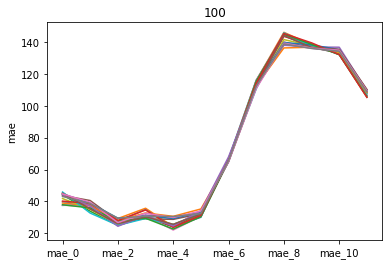

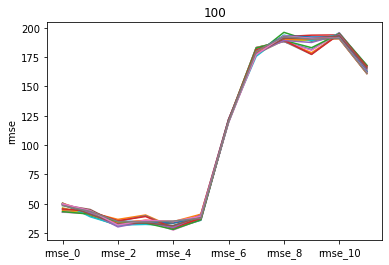

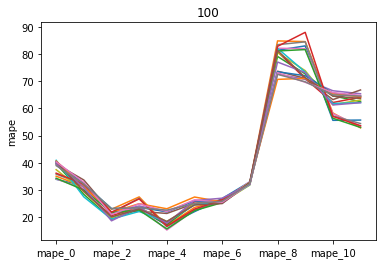

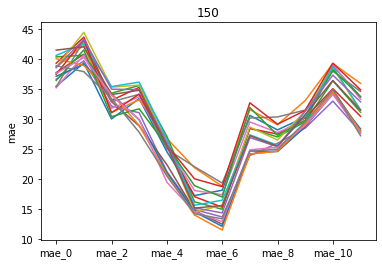

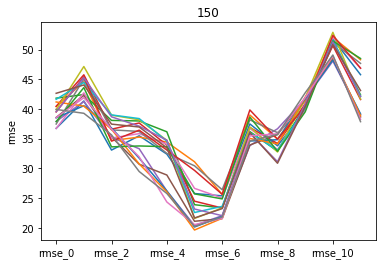

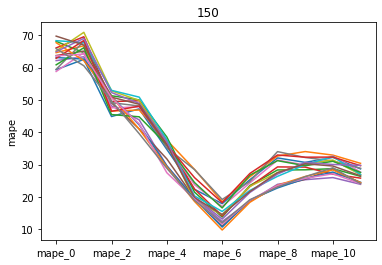

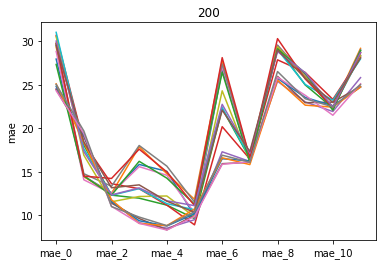

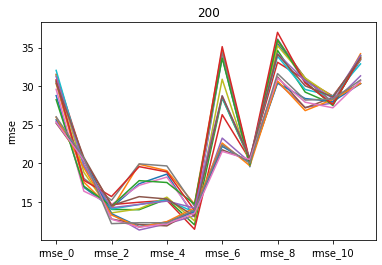

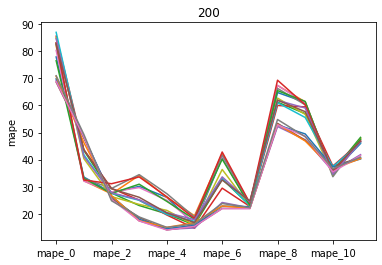

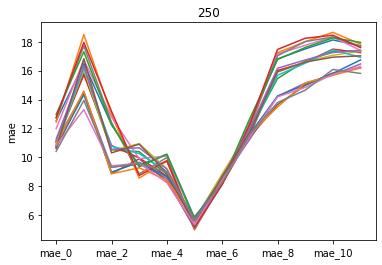

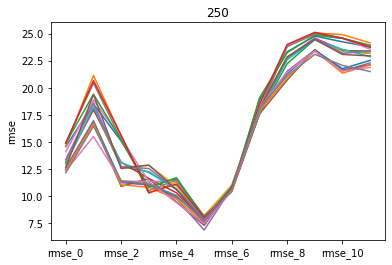

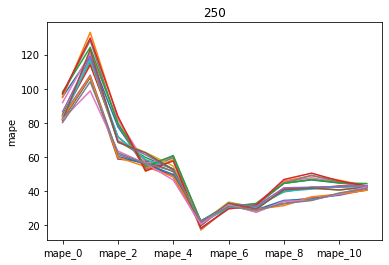

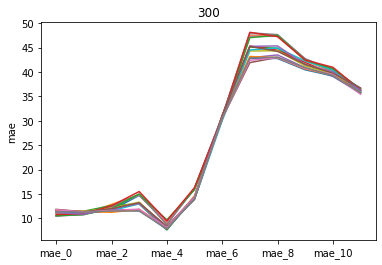

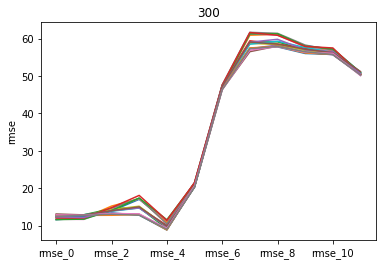

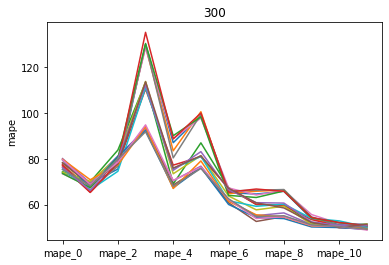

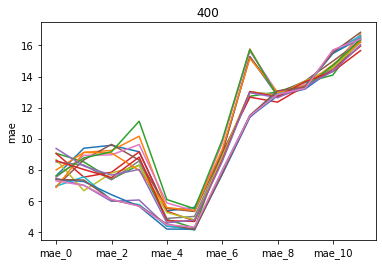

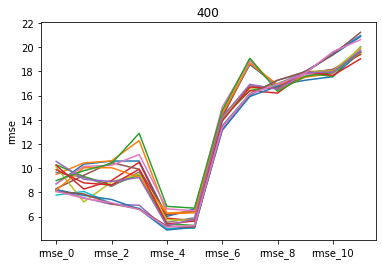

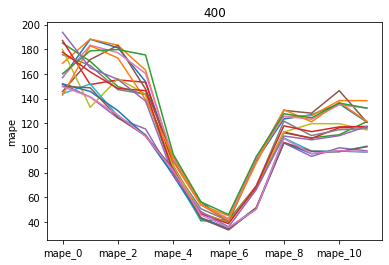

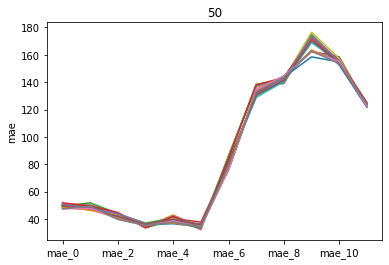

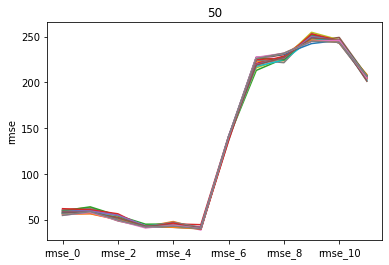

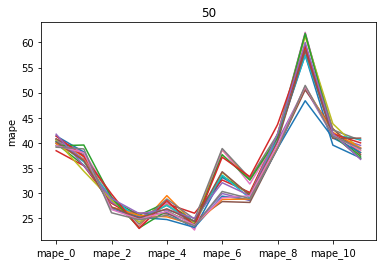

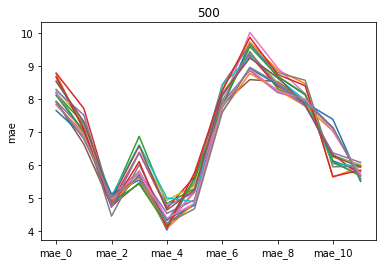

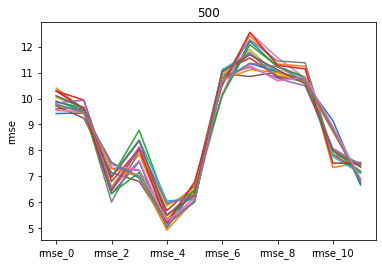

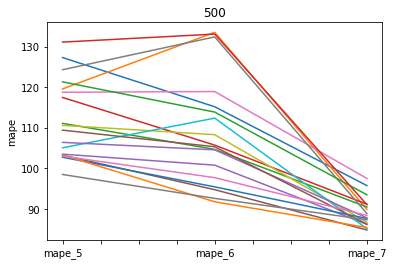

In [227]:
plot_metrics(cb_data)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


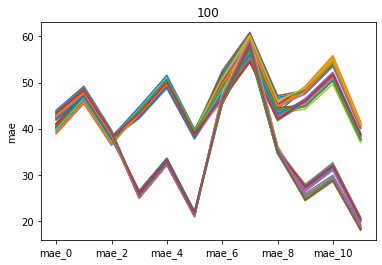

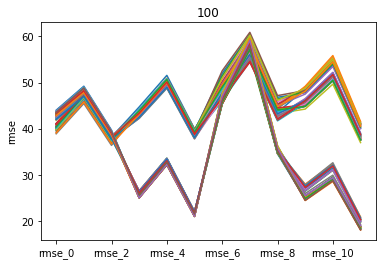

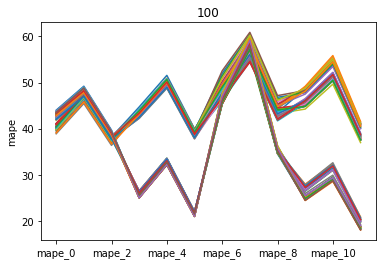

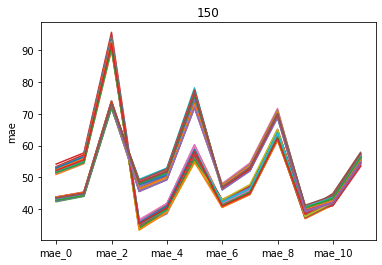

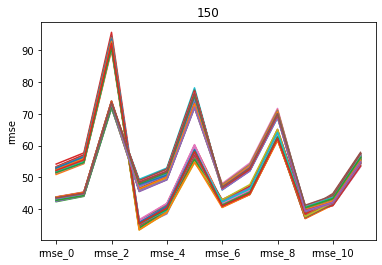

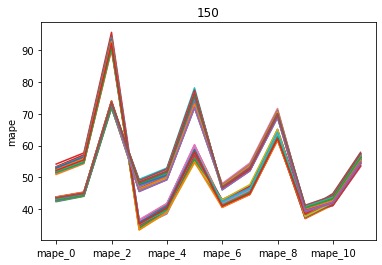

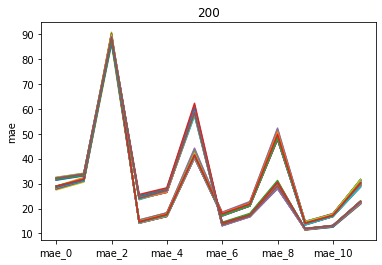

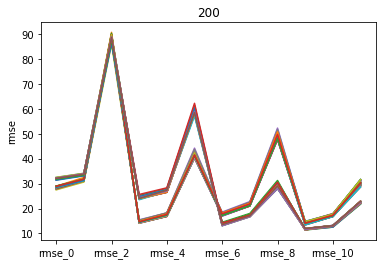

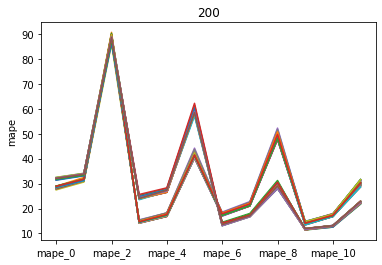

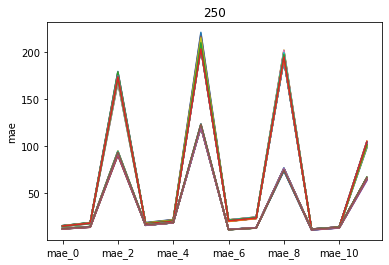

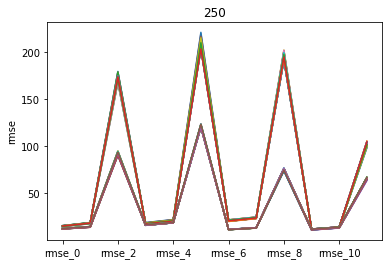

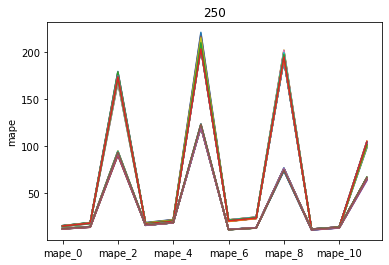

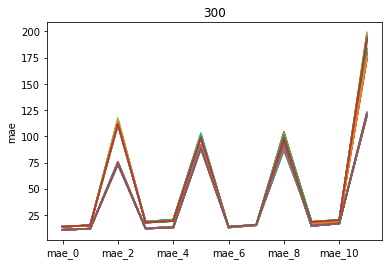

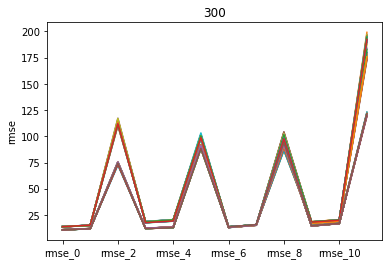

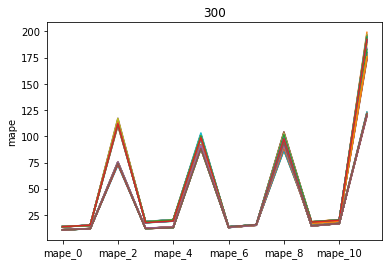

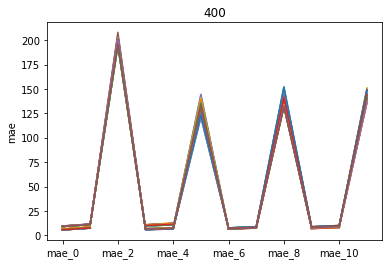

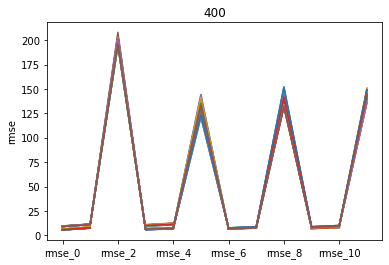

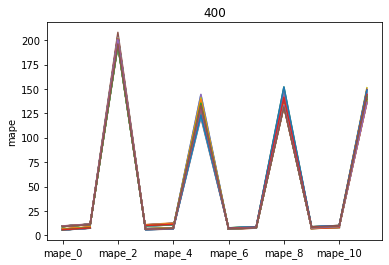

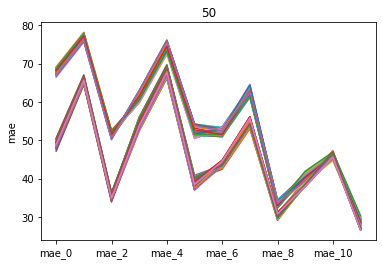

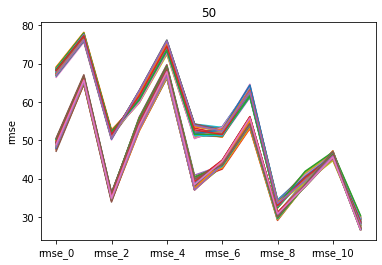

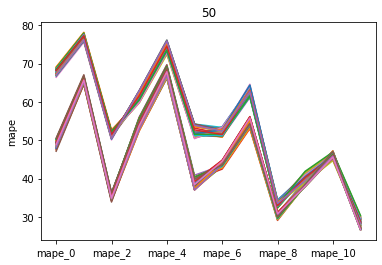

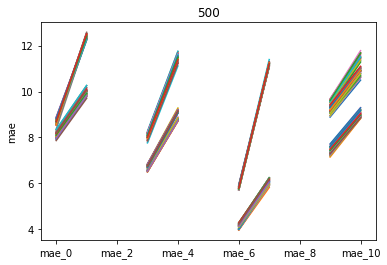

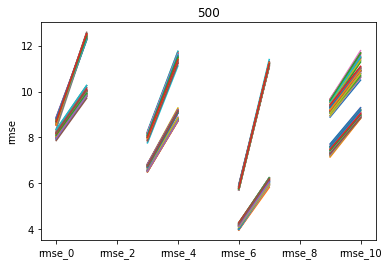

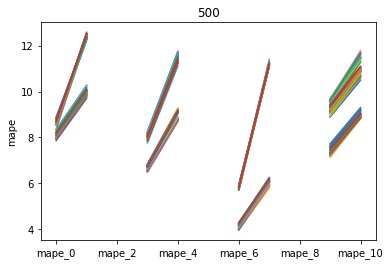

In [225]:
plot_metrics(rf_data)

In [ ]:
def multiple_metrics(y_true, y_pred):
    """1) Метрика помесячная (как была)
        2) Метрика Квартальная (сумма по кварталу)
        3) Метрика Полгодовая (сумма по полгоду)
        4) Метрика Годовая (сумма по Годовая)
        5) Метрика помесячная по 2м полугодам (сумма по полугодам)"""

    # y_true = torch.Tensor(y_true)
    # y_pred = torch.Tensor(y_pred)

    metrics = []
    metrics.append(metric_main(y_true, y_pred))

    metric_q = metric_main(y_true.reshape(4, -1).sum(axis=1), y_pred.reshape(4, -1).sum(axis=1))
    metric_h = metric_main(y_true.reshape(2, -1).sum(axis=1), y_pred.reshape(2, -1).sum(axis=1))
    metric_y = metric_main(y_true.reshape(1, -1).sum(axis=1), y_pred.reshape(1, -1).sum(axis=1))
    metric_1h = metric_main(y_true.reshape(2, -1)[0], y_pred.reshape(2, -1)[0])
    metric_2h = metric_main(y_true.reshape(2, -1)[1], y_pred.reshape(2, -1)[1])
    metrics.extend([metric_q, metric_h, metric_y, metric_1h, metric_2h])
    return metrics

In [273]:
cb_data_2 = []
for params, data in all_data_cb:
    mae = []
    rmse = []
    mapes = []
    super_metric = []
    d = {}
    d['bu'] = params['dataset_params']['business_unit']
    d['analog'] = params['dataset_params']['analog_group']
    d['log_target'] = params['dataset_params']['log_target']
    d['scaling'] = params['dataset_params']['scaling']
    d['target_column_name_formatter'] = params['dataset_params']['target_column_name_formatter']
    d['window_size'] = params['dataset_params']['window_size']
    d['use_kfold'] = params['model_type_params']['use_kfold']
    d['model_type'] = params['model_type_params']['model_type']
    d['model_kwargs_params'] = params['model_kwargs_params']
    d['max_depth'] = d['model_kwargs_params']['max_depth']
    d['n_estimators'] = d['model_kwargs_params']['n_estimators']

    for month_data in data:
        mae.append(mean_absolute_error(month_data['model_true'].iloc[:1], month_data['model_predict'].iloc[:1]))
        rmse.append(mean_squared_error(month_data['model_true'].iloc[:1], month_data['model_predict'].iloc[:1], squared=False))
        mapes.append(mape(month_data['model_true'].iloc[:1], month_data['model_predict'].iloc[:1]))
        # super_metric.append(metric_main(month_data['model_true'].iloc[:1], month_data['model_predict'].iloc[:1]))
        super_metric.append((month_data['model_true'].iloc[0], month_data['model_predict'].iloc[0]))
    super_metric = np.array(super_metric)
    super_metric2 = metric_main(super_metric[:, 0], super_metric[:, 1])
    d.update({f"mae_{i}": mae[i] for i in range(12)})
    d.update({f"rmse_{i}": rmse[i] for i in range(12)})
    d.update({f"mape_{i}": mapes[i] for i in range(12)})
    # d.update({f"metric_main_{i}": super_metric[i] for i in range(12)})
    # d.update({f"metric_main": super_metric2})
    d.update({f"metric_main{key}": value for key, value in zip(['', '_q', '_h', '_y', '_1h', '_2h'], multiple_metrics(super_metric[:, 0], super_metric[:, 1]))})
    cb_data_2.append(d)

cb_data_2 = pd.DataFrame(cb_data_2)

In [274]:
import seaborn as sns

In [294]:
"metric_main	metric_main_q	metric_main_h	metric_main_y	metric_main_1h	metric_main_2h".split('\t')

['metric_main',
 'metric_main_q',
 'metric_main_h',
 'metric_main_y',
 'metric_main_1h',
 'metric_main_2h']

In [298]:
cb_data_2[['analog', 'metric_main',
 'metric_main_q',
 'metric_main_h',
 'metric_main_y',
 'metric_main_1h',
 'metric_main_2h']]

,analog,metric_main,metric_main_q,metric_main_h,metric_main_y,metric_main_1h,metric_main_2h
0,50,0.533848,0.611737,0.800832,0.823095,0.633014,0.476122
1,50,0.528898,0.602365,0.813457,0.857711,0.641097,0.463586
2,50,0.538133,0.627745,0.801960,0.817195,0.632313,0.483309
3,50,0.536201,0.628919,0.792963,0.819145,0.639301,0.476186
4,50,0.530016,0.643666,0.768108,0.811638,0.604459,0.486683
...,...,...,...,...,...,...,...
138,500,0.030885,0.439613,0.722888,0.927757,-0.391546,0.264363
139,500,0.139042,0.461010,0.757145,0.982918,-0.262357,0.360896
140,500,0.136096,0.473245,0.773763,0.967274,-0.252727,0.350999
141,500,0.151389,0.483460,0.750309,0.881168,-0.221721,0.357607


In [303]:
l = []

for key, df in cb_data_2.groupby('analog'):
    for metric in ['metric_main', 'metric_main_q', 'metric_main_h', 
                    'metric_main_y', 'metric_main_1h', 'metric_main_2h']:
        # print(key, metric, df[metric].agg([min, 'mean', max]).values)
        l.append((key, metric, *df[metric].agg([min, 'mean', max]).values))

In [307]:
pd.DataFrame(l, columns=['analog', 'metric', 'min', 'mean', 'max']).to_excel('metric_main.xlsx')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

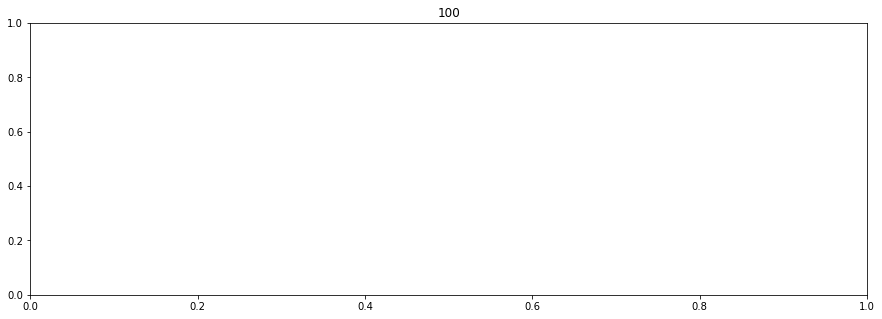

In [296]:
for key, df in cb_data_2.groupby('analog'):
    plt.figure(figsize=(15,5))
    plt.title(key)
    # plt.hist(df['metric_main'].values)
    sns.violinplot(df[['metric_main', 'metric_main_q', 'metric_main_h', 'metric_main_y',
                       'metric_main_1h', 'metric_main_2h']])
    plt.show()
    break

In [234]:
# def plot_metrics_2(res_df, groupby='analog'):
#     mae_cols = [f'mae_{i}' for i in range(12)]
#     rmse_cols = [f'rmse_{i}' for i in range(12)]
#     mape_cols = [f'mape_{i}' for i in range(12)]
#     metric_main_cols = [f'metric_main_{i}' for i in range(12)]
#     for key, group in res_df.groupby(groupby):
#         group[mae_cols].T.plot(legend=False, title=key, ylabel='mae')
#         group[rmse_cols].T.plot(legend=False, title=key, ylabel='rmse')
#         group[mape_cols].T.plot(legend=False, title=key, ylabel='mape')
#         group[metric_main_cols].T.plot(legend=False, title=key, ylabel='metric_main')

In [313]:
task.get_parameters()

{'dataset/dataset_id': '5dc94de095014553acbe4f011a579241',
 'dataset/dataset_file_name': 'dataset_ws60.parquet',
 'dataset_params/business_unit': 'all',
 'dataset_params/analog_group': '500',
 'dataset_params/window_size': '120',
 'dataset_params/split_date': '01.01.2021',
 'dataset_params/target_column_name_formatter': 'predict_normalized_{}',
 'dataset_params/log_target': 'False',
 'dataset_params/scaling': 'Standard',
 'dataset_params/scaler_kwargs': '',
 'model_type_params/model_type': 'CatBoostRegressor',
 'model_type_params/use_kfold': 'False',
 'model_type_params/save_kfold_predicts': 'True',
 'model_type_params/save_model': 'False',
 'model_kwargs_params/alpha': '1.0',
 'model_kwargs_params/max_depth': '10',
 'model_kwargs_params/n_estimators': '1000',
 'model_kwargs_params/l2_leaf_reg': '1',
 'kflod_kwargs_params/n_splits': '5',
 'kflod_kwargs_params/shuffle': 'False'}